In [1]:
import matplotlib as mpl

new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'
                }

mpl.rcParams.update(new_rc_params)
import matplotlib.cm as cm

In [2]:
import sys, os
import numpy as np
import scipy.io
import pandas as pd
from joblib import Parallel, delayed

file_path = 'Data/Marmoset_Hn/'
# file_path = 'Data/Go20150826S1/'
area_map_path = 'Data/Marmoset_Hn/Area_map_Marmoset_H.xlsx'
# area_map_path = '../Ref/Area_map_Marmoset_G.xlsx'
delete_index = np.array([24, 25, 34, 35, 44, 45, 46, 47])
# delete_index = []
mag_path = 'Data/Marmoset_Hn/mag_stim_hn.mat'
# mag_path = 'Data_New/Marmoset_Go/mag_stim_Go.mat'

df = pd.read_excel(area_map_path)
Region = np.array(df['Region'])
Region = np.delete(Region, delete_index, axis=0)
Area = np.array(df['Area'])
Area = np.delete(Area, delete_index, axis=0)


mag_mat = scipy.io.loadmat(mag_path)['mag_mat']

In [3]:
import sys, os
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import io

import pre_functions_clean as pf
import time_constant_shuffle_FLN as tc
import Time_Constant_Plot as TCP

# =============================================================================
# Read Network Data
MACAQUE_CASE=0
CONSENSUS_CASE=0
datafile='subgraph_data_marmoset.pkl'
p = pf.load_data(datafile)
p,W = pf.genetate_net_connectivity(p,LINEAR_HIER=0,IDENTICAL_HIER=0,FIT_HIER=1, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,IDENTICAL_FLN=0,
                                   SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,MACAQUE_CASE=MACAQUE_CASE,
                                   GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                   diverse_hi=4)


Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


In [4]:
p['muIE']

49.81041566951567

In [5]:
# Align the experiment & simulation
[m, n] = np.shape(mag_mat)
mag_mat_aligned = np.zeros([m, p['n_area']])
for i in range(m):
    mag_i = mag_mat[i, :]
    for k in range(p['n_area']):
        area_k = p['areas'][k]
        if area_k in Area:
            mag_mat_aligned[i, k] = np.mean(mag_i[Area == area_k])

# Fig A: Comparison of model's response after stimulus to A4ab with experiment data

## Model's Response

Running network with stimulation to A4ab   PULSE_INPUT=1   MACAQUE_CASE=0


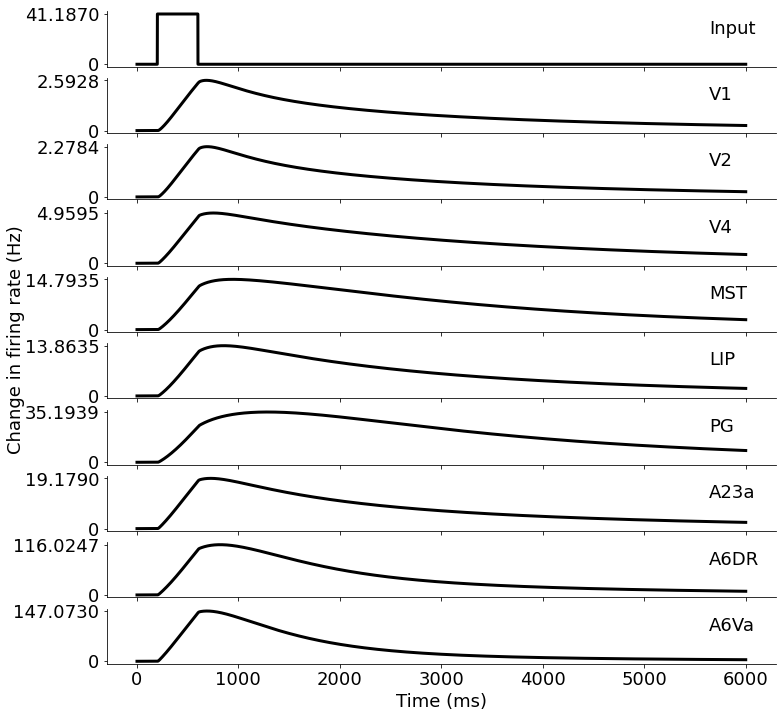

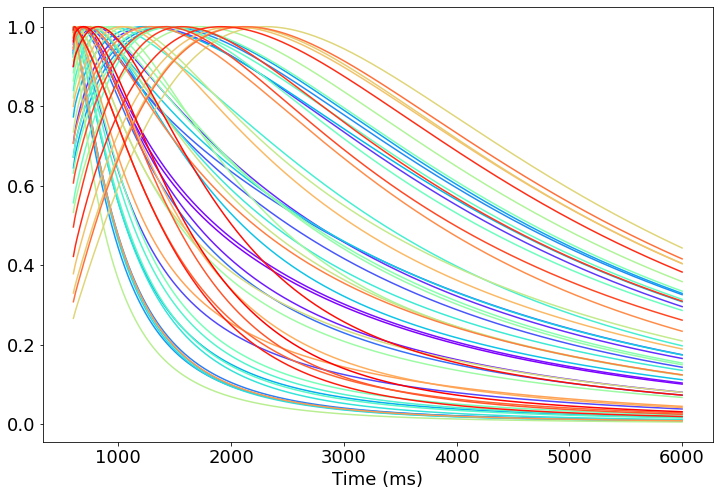

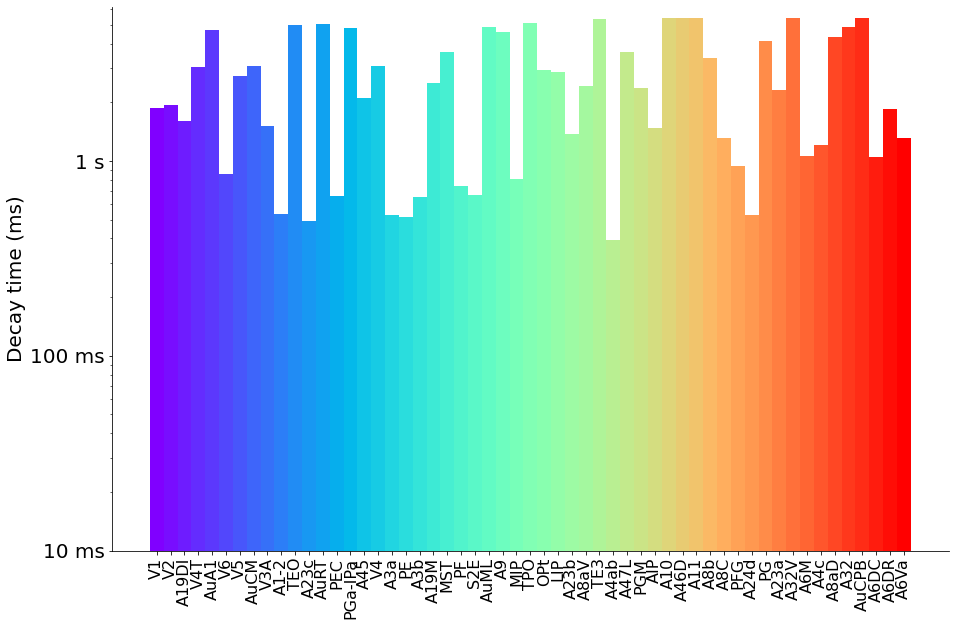

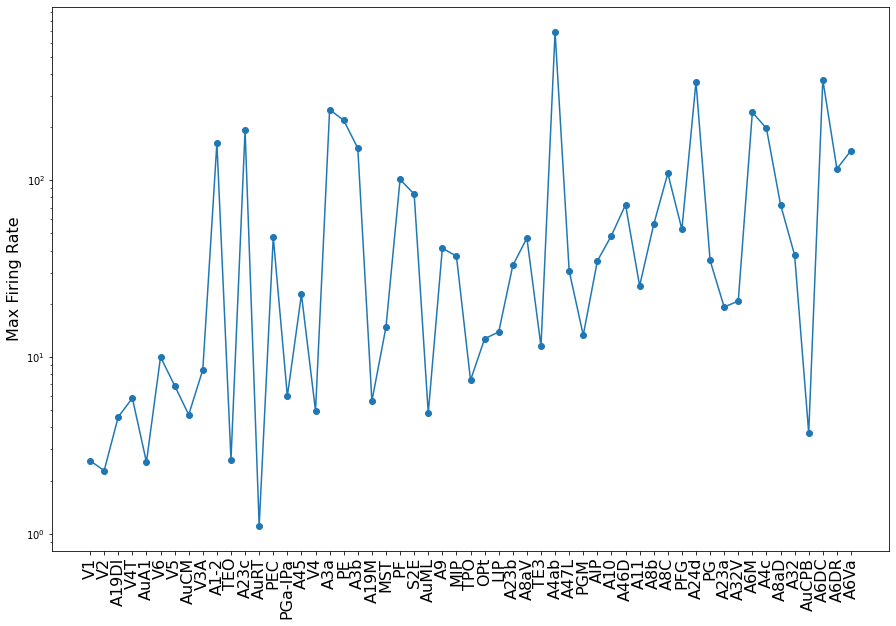

In [6]:
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate, f \
= pf.run_stimulus(p,VISUAL_INPUT=1,TOTAL_INPUT=0, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0, stim_area='A4ab', plot_Flag=1)

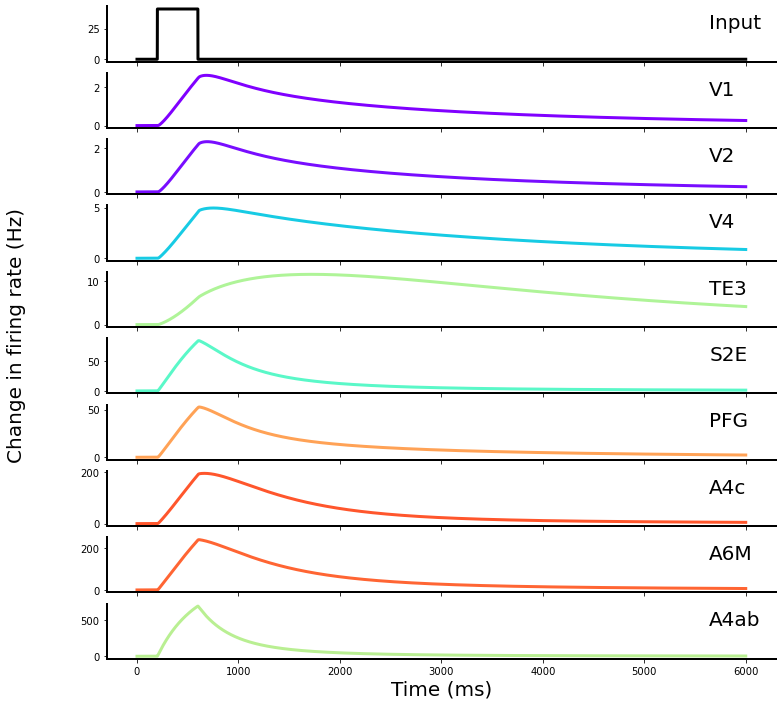

In [7]:
area_name_list = ['V1','V2','V4','TE3', 'S2E','PFG','A4c','A6M','A4ab']
fig = TCP.plot_dynamics(p, r_exc, r_inh, I_stim_exc, area_stim_idx, area_name_list, t_plot, PULSE_INPUT=1)
# TCP.save_fig('Figures/6A_a')

## Compare with Experiment Data (Peak magnitude)

(10, 1000)

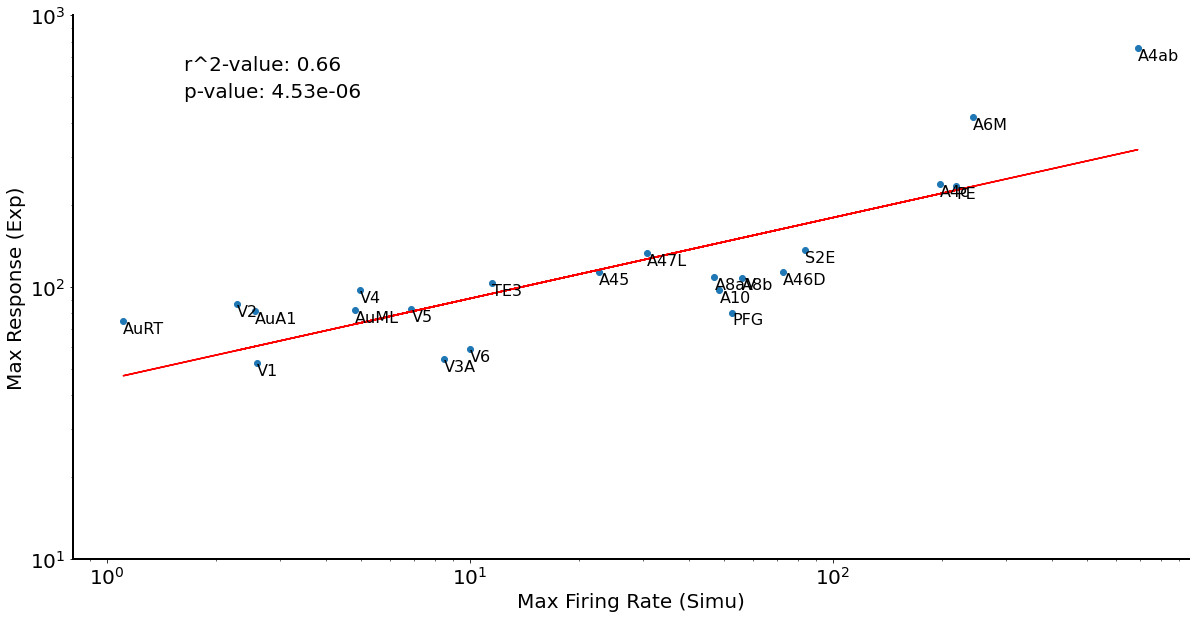

In [8]:
from scipy import stats

fig, ax = plt.subplots(figsize=(20,10), facecolor=(1, 1, 1))
mag_lst_aligned = mag_mat_aligned[4,:]
index_sel = mag_lst_aligned != 0 # np.arange(len(mag_lst_aligned)) # mag_lst_aligned != 0
max_rate_sel = max_rate[index_sel]
mag_lst_sel = mag_lst_aligned[index_sel]
areas_sel = np.array(p['areas'])[index_sel]
plt.scatter(max_rate_sel , mag_lst_sel)
for i in range(len(areas_sel)):
    plt.annotate(areas_sel[i], (max_rate_sel[i], mag_lst_sel[i]), rotation=0,
                 horizontalalignment='left', verticalalignment='top',
                 fontsize = 16)
plt.xscale('log')
plt.yscale('log')
# corr = np.corrcoef(max_rate[mag_lst_aligned != 0], mag_lst_aligned[mag_lst_aligned != 0])[0,1]
# plt.title('Response after stimulus to A4ab, Corr = {:.2f}'.format(corr), fontsize=20)
plt.xlabel('Max Firing Rate (Simu)', fontsize=20)
plt.ylabel('Max Response (Exp)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(max_rate_sel), np.log10(mag_lst_sel))
plt.plot(max_rate_sel, np.power(10, slope*np.log10(max_rate_sel) + intercept), color='red') 
# Print the p-value on the figure
r2_value = np.power(r_value, 2)
plt.text(0.1, 0.9, f'r^2-value: {r2_value:.2f}', transform=plt.gca().transAxes, fontsize=20)
plt.text(0.1, 0.85, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.ylim([10, 1000])
# TCP.save_fig('Figures/6A_b')

# Fig B: Comparison of model's response after stimulus to A4ab with experiment data

## Model's response after stimulus to V1

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


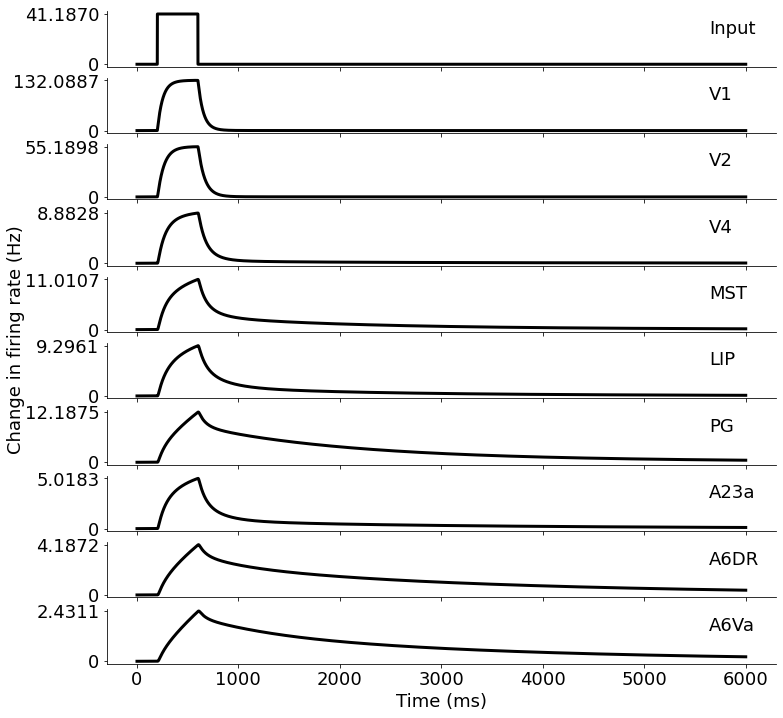

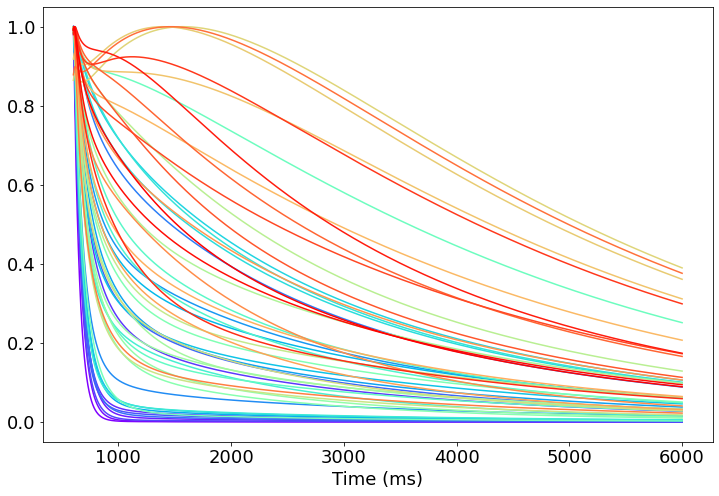

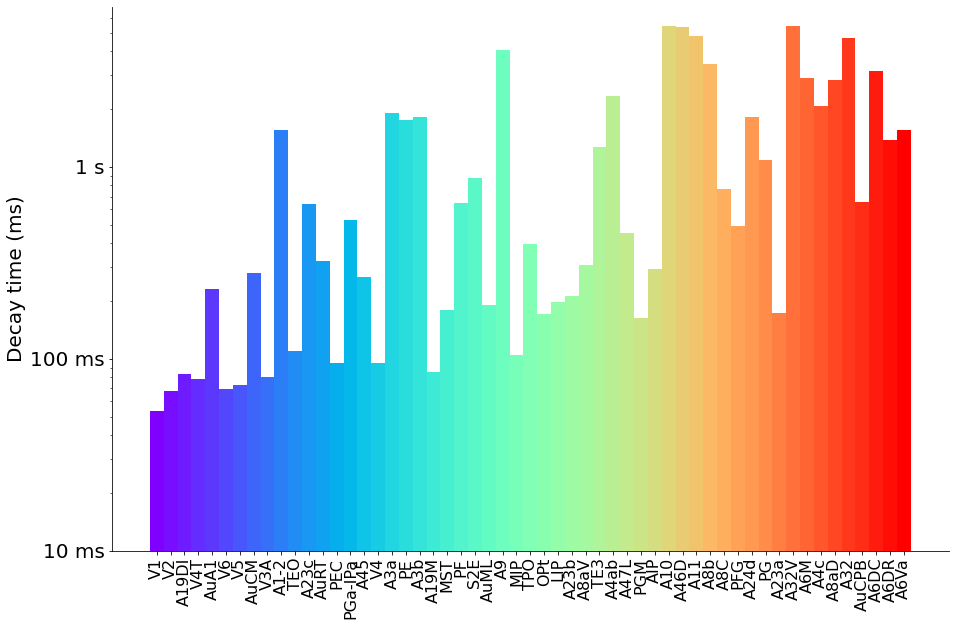

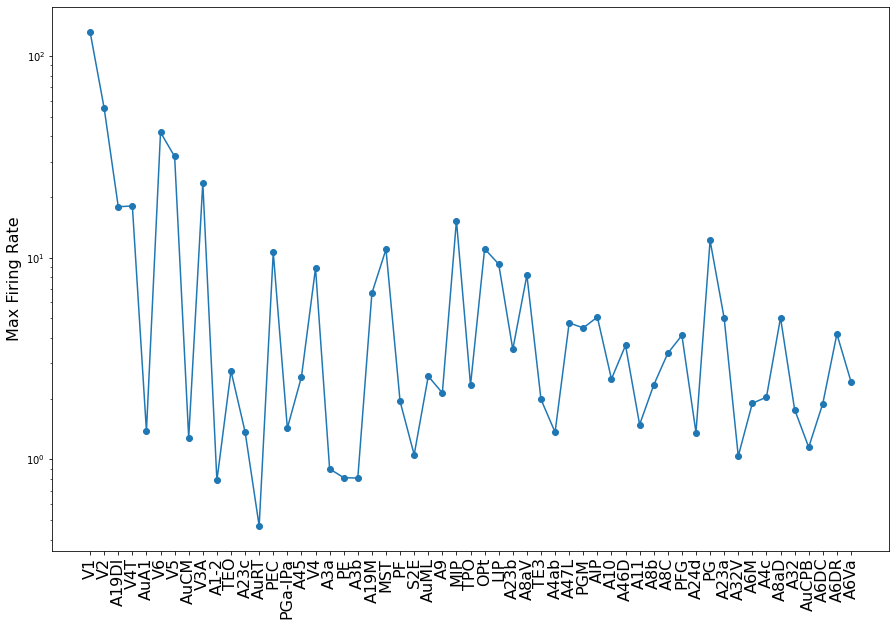

In [9]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p, W = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate, f\
 = pf.run_stimulus(p,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=1)

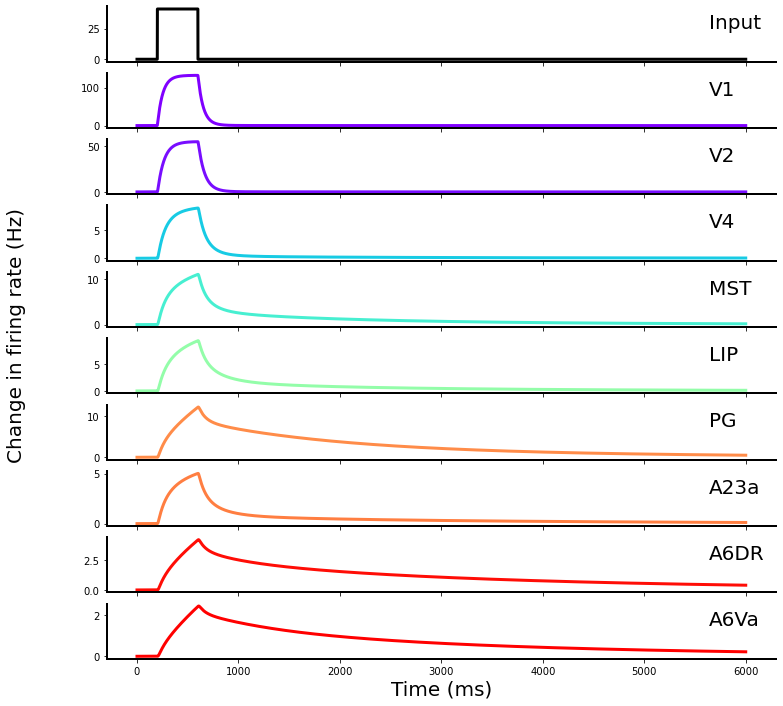

In [10]:
area_name_list = ['V1','V2','V4','MST','LIP','PG','A23a','A6DR','A6Va']
fig = TCP.plot_dynamics(p, r_exc, r_inh, I_stim_exc, area_stim_idx, area_name_list, t_plot, PULSE_INPUT=1)
# TCP.save_fig('Figures/6B')

## Model's response after stimulus to AuA1

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to AuA1   PULSE_INPUT=1   MACAQUE_CASE=0


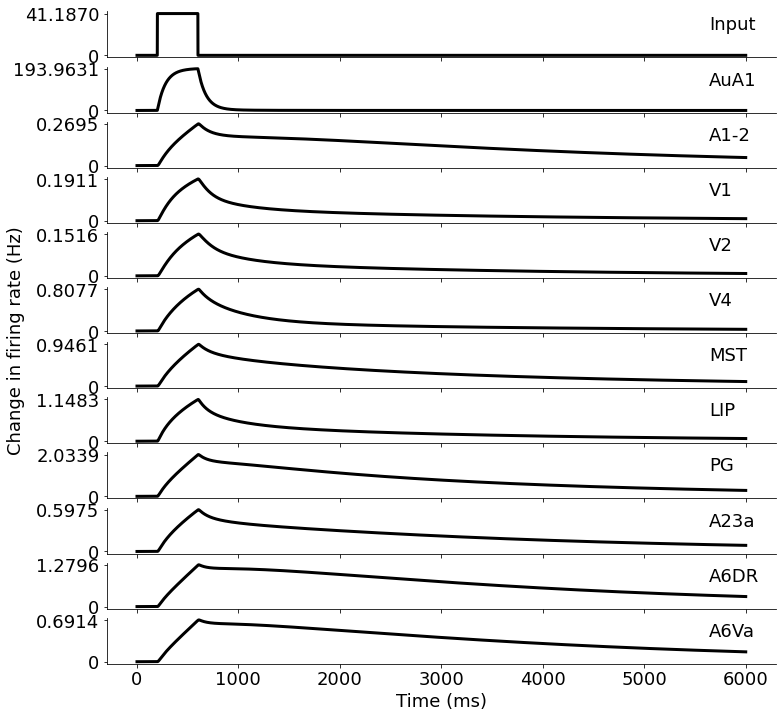

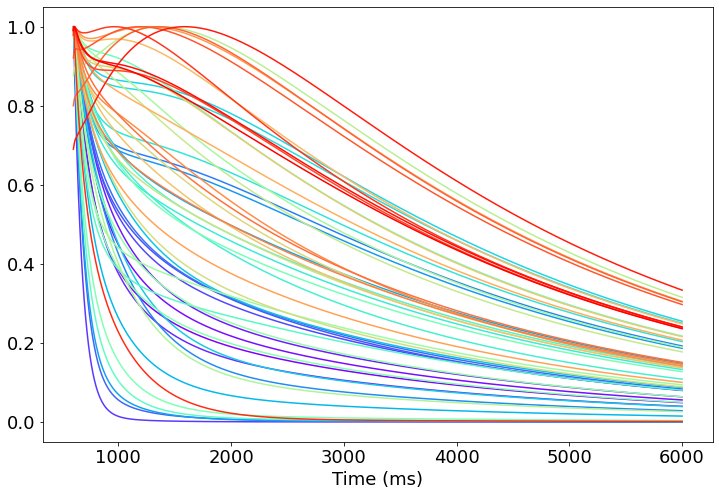

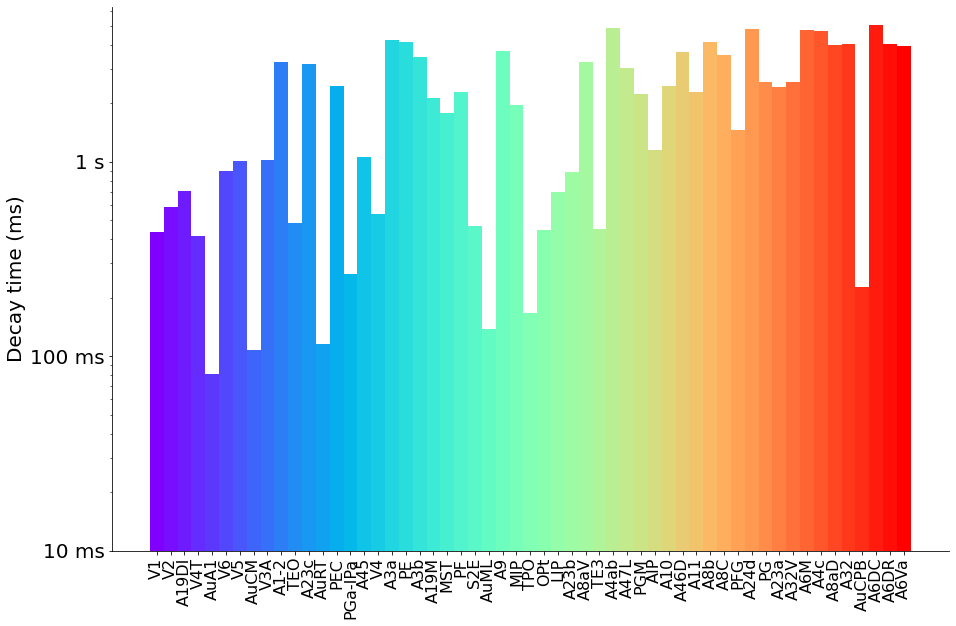

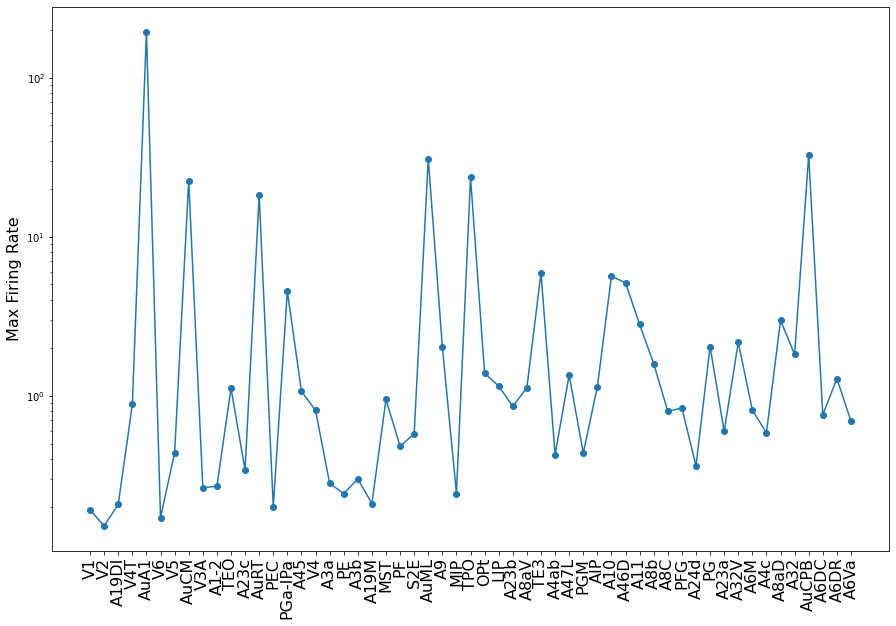

In [11]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p, W = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate, f\
 = pf.run_stimulus(p,VISUAL_INPUT=0,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=1)

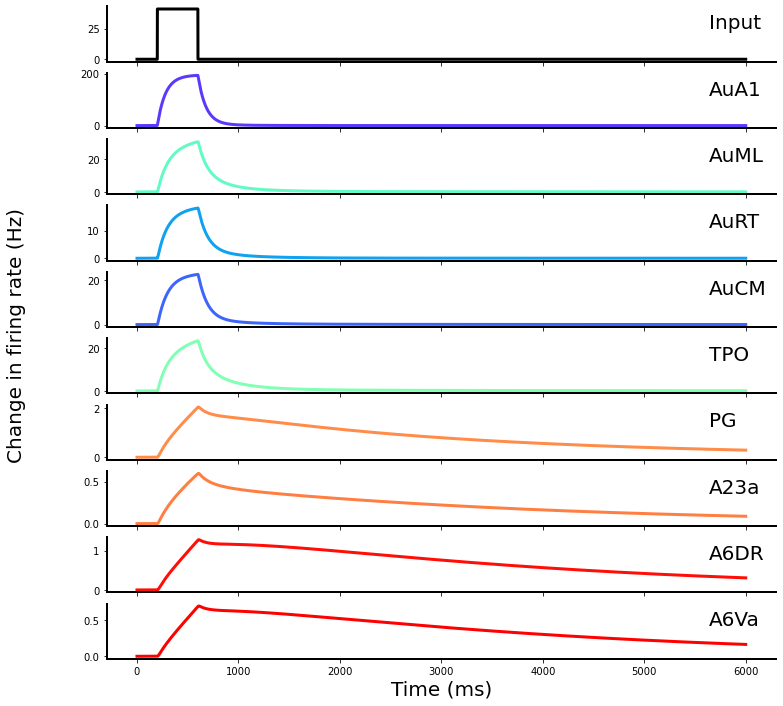

In [12]:
area_name_list = ['AuA1','AuML','AuRT', 'AuCM', 'TPO','PG', 'A23a','A6DR','A6Va']
fig = TCP.plot_dynamics(p, r_exc, r_inh, I_stim_exc, area_stim_idx, area_name_list, t_plot, PULSE_INPUT=1)
# TCP.save_fig('Figures/6B_Supp')

# Fig C: Model's response when breaking GBA condition; comparison with the original ones.

In [8]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

# p_noGBA, W_noGBA = pf.genetate_net_connectivity(p.copy(),LINEAR_HIER=0,FIT_HIER=1, IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
#                                     IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
#                                     MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE)

p_noGBA, W_noGBA = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)
p_noGBA['muEE'] *= 0.975

# GLOBAL EE

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p_ori,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_noGBA \
 = pf.run_stimulus(p_noGBA,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


In [9]:
1/0.98

1.0204081632653061

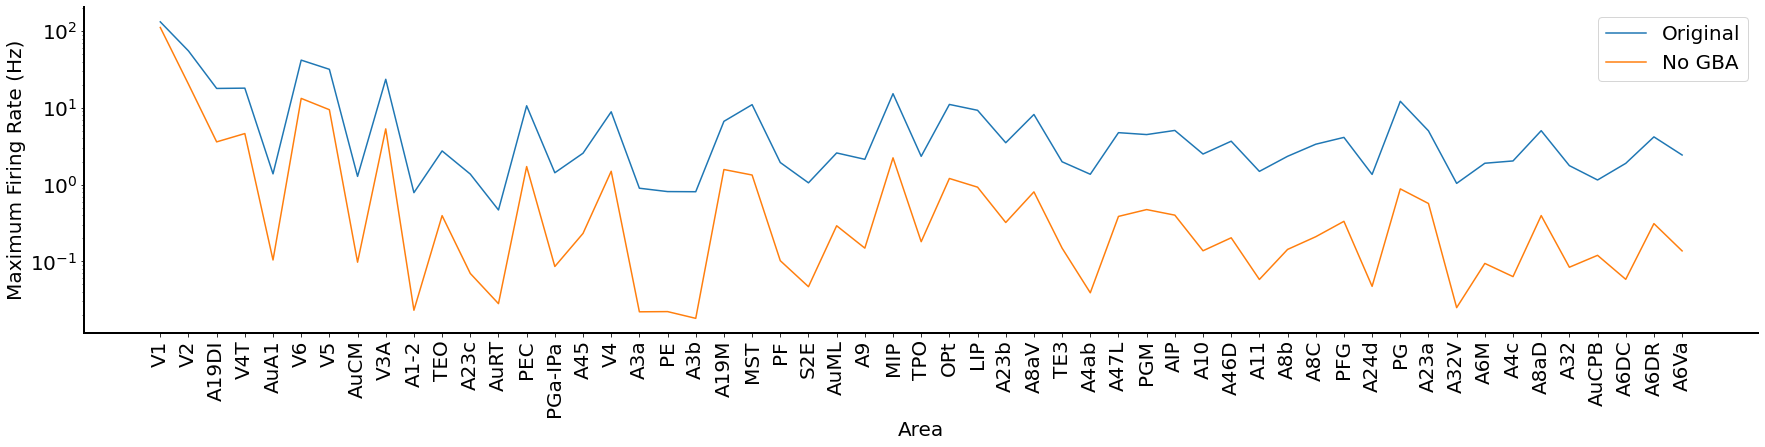

In [12]:
fig,ax=plt.subplots(1, 1,figsize=(30, 6), facecolor=(1, 1, 1))
plt.plot(max_rate, '-'); plt.yscale('log')
plt.plot(max_rate_noGBA, '-'); plt.yscale('log')
plt.legend(['Original', 'No GBA'],fontsize=20)
plt.xlabel('Area', fontsize=20)
plt.ylabel('Maximum Firing Rate (Hz)', fontsize=20)
plt.xticks(np.arange(len(p['areas'])), p['areas'],rotation=90,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
TCP.save_fig('Figures/6C')

# Fig D:  A typical area(PG)'s response when varying the magnitude of w_II and mu_IE.

In [16]:
p['areas'][-11]

'PG'

## Response versus magnitude of w_II

In [17]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p, W = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

wII_lst = np.linspace(12, 12.52, 22)
rate_PG_lst = 0 * wII_lst
for i in np.arange(len(wII_lst)):
    p_t = p.copy()
    p_t['wII'] = wII_lst[i]
    I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
     = pf.run_stimulus(p_t,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
    rate_PG_lst[i] = max_rate[-11]

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQU

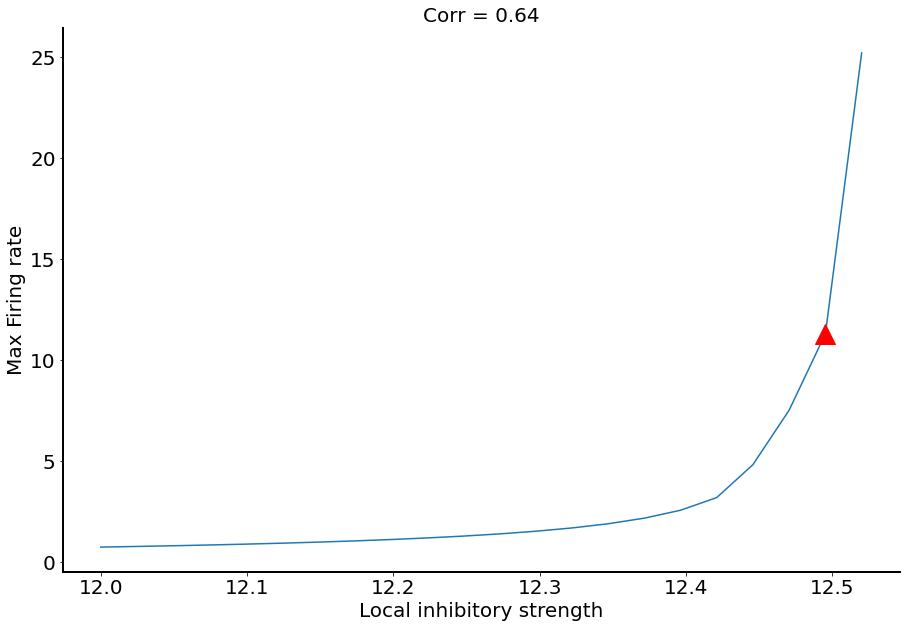

In [18]:
fig = TCP.plot_line_curve(rate_PG_lst, wII_lst, p_t['areas'],
                          x_label='Local inhibitory strength', y_label='Max Firing rate')
plt.plot(wII_lst[-2], rate_PG_lst[-2], 'r^', ms=20)
# TCP.save_fig('Figures/6D_a')

# fig, ax = plt.subplots(1,1,figsize=(12, 10))

# plt.plot(wII_lst, rate_PG_lst, '*-')

# plt.xlabel('wII')
# plt.ylabel('Rate of PG')

# Closing to criticality -- higher firing rate > 10

## Response versus magnitude of mu_IE

In [19]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p, W = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)


muIE_lst = p['muIE'] + np.linspace(-0.1, 2, 22)
rate_PG_lst = 0 * muIE_lst
for i in np.arange(len(muIE_lst)):
    p_t = p.copy()
    p_t['muIE'] = muIE_lst[i]
    I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
     = pf.run_stimulus(p_t,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
    rate_PG_lst[i] = max_rate[-11]
    # print(max_rate[-11])

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQU

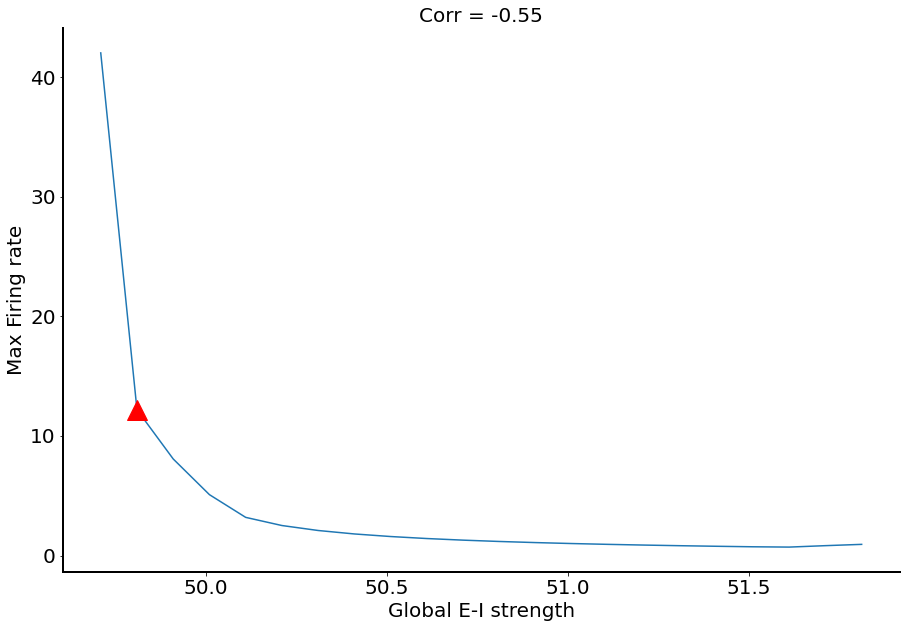

In [20]:
# fig, ax = plt.subplots(1,1,figsize=(12, 10))
# plt.plot(muIE_lst, rate_PG_lst, '*-')
# plt.plot(muIE_lst[0], rate_PG_lst[0], 'r^')
# plt.xlabel('muIE')
# plt.ylabel('Rate of PG')
fig = TCP.plot_line_curve(rate_PG_lst, muIE_lst, p_t['areas'],
                          x_label='Global E-I strength', y_label='Max Firing rate')
plt.plot(muIE_lst[1], rate_PG_lst[1], 'r^', ms=20)
# TCP.save_fig('Figures/6D_b')

# Fig E: Comparison of response of original and without feedback FLN (also including shuffled FLN?).

In [20]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

p_FF, W_FF = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,FF_FLN=1,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p_ori,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_FF \
 = pf.run_stimulus(p_FF,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Feedforward FLN only 

CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


## Feedforward by Upper-triangle

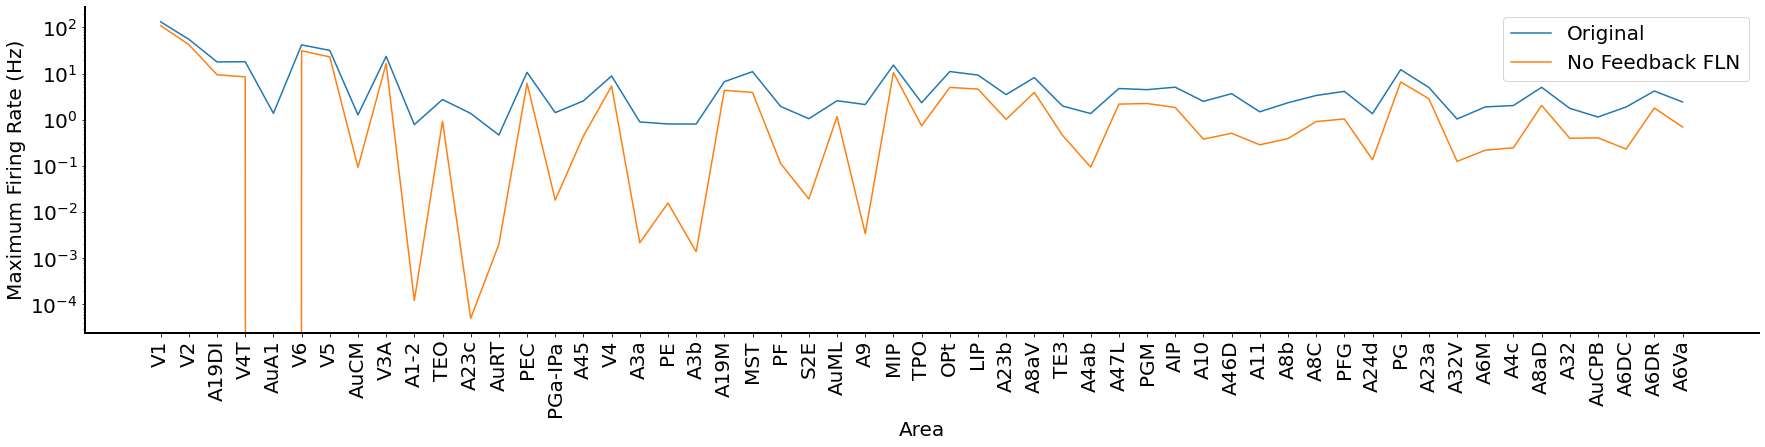

In [21]:
fig,ax=plt.subplots(1, 1,figsize=(30, 6), facecolor=(1, 1, 1))
plt.plot(max_rate, '-'); plt.yscale('log')
plt.plot(max_rate_FF, '-'); plt.yscale('log')
plt.legend(['Original', 'No Feedback FLN'],fontsize=20)
plt.xlabel('Area', fontsize=20)
plt.ylabel('Maximum Firing Rate (Hz)', fontsize=20)
plt.xticks(np.arange(len(p['areas'])), p['areas'],rotation=90,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# TCP.save_fig('Figures/6E_Supp')

## Delete feedforward FLN

In [11]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

p_FB, W_FB = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,FB_FLN=1,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p_ori,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_FB \
 = pf.run_stimulus(p_FB,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
Feedforward FLN only 

CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


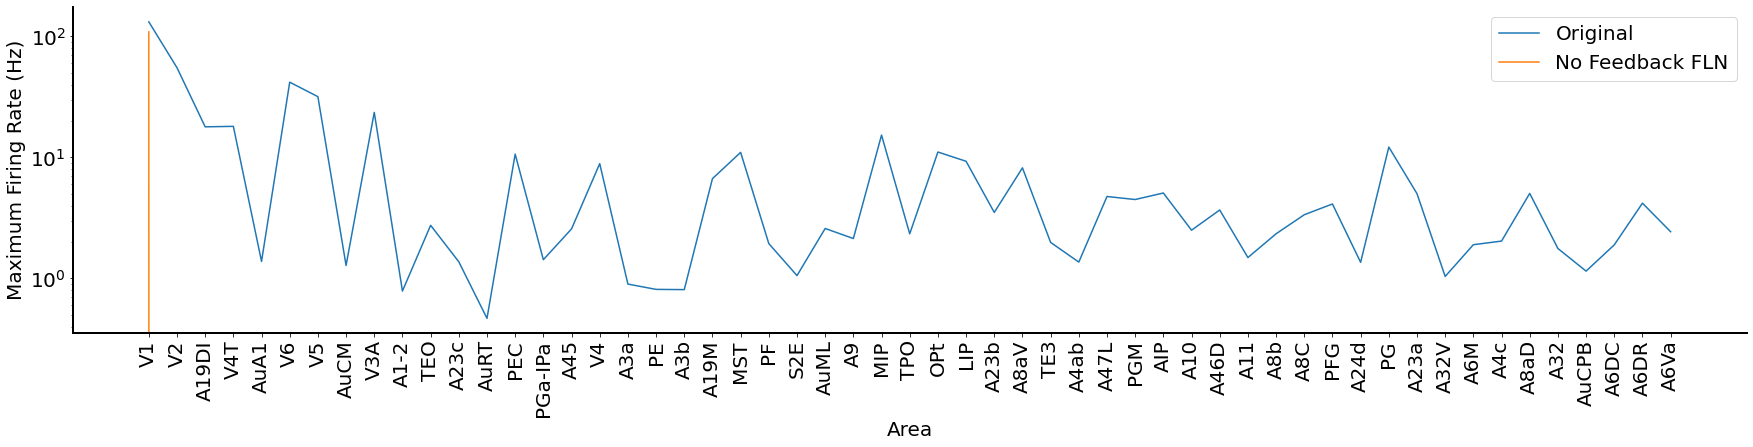

In [12]:
fig,ax=plt.subplots(1, 1,figsize=(30, 6), facecolor=(1, 1, 1))
plt.plot(max_rate, '-'); plt.yscale('log')
plt.plot(max_rate_FB, '-'); plt.yscale('log')
plt.legend(['Original', 'No Feedforward FLN'],fontsize=20)
plt.xlabel('Area', fontsize=20)
plt.ylabel('Maximum Firing Rate (Hz)', fontsize=20)
plt.xticks(np.arange(len(p['areas'])), p['areas'],rotation=90,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# TCP.save_fig('Figures/6E_Supp')

## Feedforward by FLN

In [25]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

p_FF2, W_FF2 = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,FF_FLN=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

fln_mat[p_FF['sln_mat'] < 0.5] = 0
p_FF2['fln_mat'] = fln_mat

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p_ori,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_FF2 \
 = pf.run_stimulus(p_FF2,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


In [26]:
np.sum(p_ori['fln_mat'] - p_FF['fln_mat'])

18.835569746059527

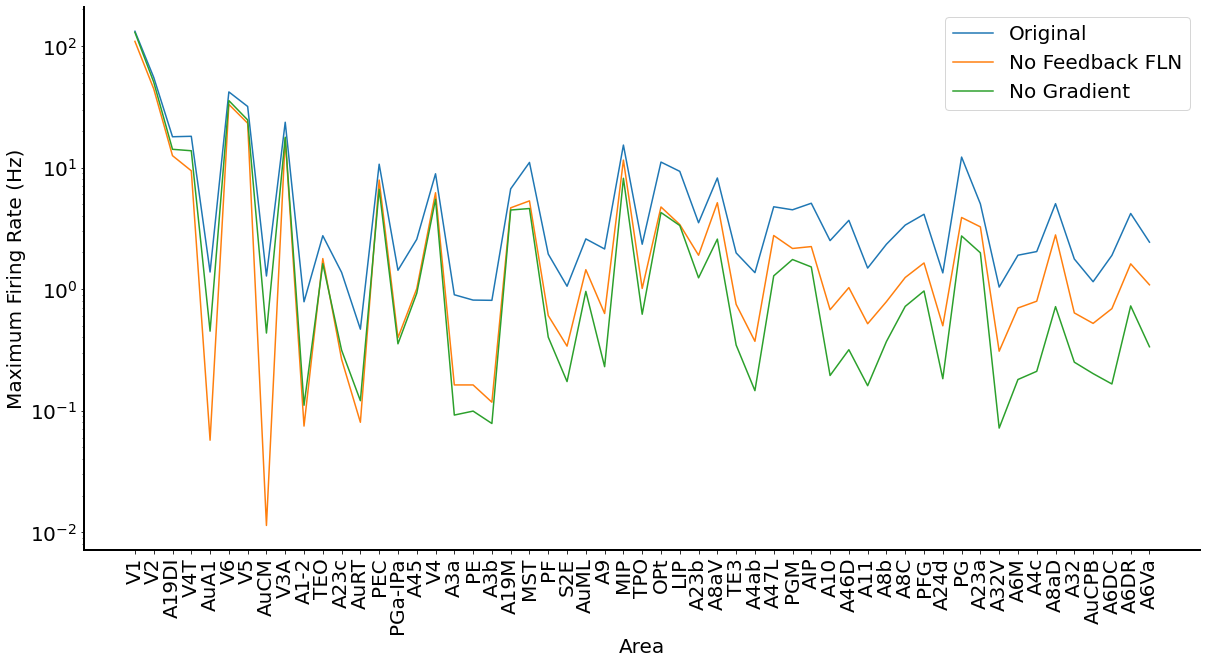

In [40]:
fig,ax=plt.subplots(1, 1,figsize=(20, 10), facecolor=(1, 1, 1))
plt.plot(max_rate, '-'); plt.yscale('log')
plt.plot(max_rate_FF2, '-'); plt.yscale('log')
plt.plot(max_rate_nog, '-'); plt.yscale('log')
plt.legend(['Original', 'No Feedback FLN', 'No Gradient'],fontsize=20)
plt.xlabel('Area', fontsize=20)
plt.ylabel('Maximum Firing Rate (Hz)', fontsize=20)
plt.xticks(np.arange(len(p['areas'])), p['areas'],rotation=90,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
TCP.save_fig('Figures/6E_New')

## Feedback by SLN

In [18]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

p_FB, W_FB = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,FF_FLN=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

fln_mat[p_FB['sln_mat'] > 0.5] = 0
p_FB['fln_mat'] = fln_mat

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p_ori,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_FB \
 = pf.run_stimulus(p_FB,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


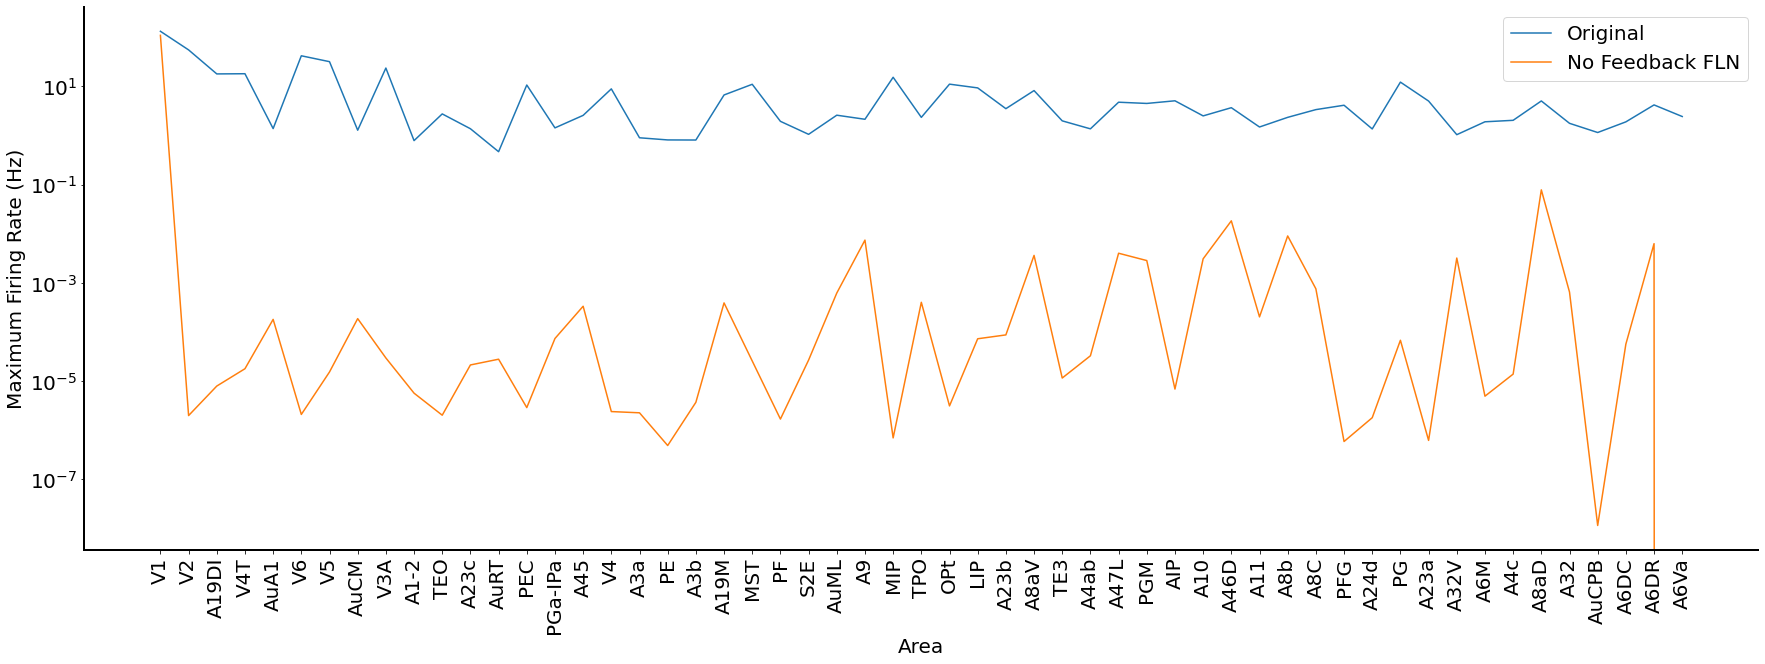

In [19]:
fig,ax=plt.subplots(1, 1,figsize=(30, 10), facecolor=(1, 1, 1))
plt.plot(max_rate, '-'); plt.yscale('log')
plt.plot(max_rate_FB, '-'); plt.yscale('log')
plt.legend(['Original', 'No Feedback FLN'],fontsize=20)
plt.xlabel('Area', fontsize=20)
plt.ylabel('Maximum Firing Rate (Hz)', fontsize=20)
plt.xticks(np.arange(len(p['areas'])), p['areas'],rotation=90,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Fig F: Comparison of response of original and without gradient (and identical gradient / linear gradient?).

In [29]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

p_nog, W_nog = pf.genetate_net_connectivity(p.copy(),FIT_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,FF_FLN=0,ZERO_HIER = 1,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

p_lig, W_lig = pf.genetate_net_connectivity(p.copy(),FIT_HIER=0, LINEAR_HIER=1,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,FF_FLN=0,ZERO_HIER = 0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
 = pf.run_stimulus(p_ori,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_nog \
 = pf.run_stimulus(p_nog,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate_lig \
 = pf.run_stimulus(p_lig,VISUAL_INPUT=1,TOTAL_INPUT=0,T=6000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA
ZERO_HIER 

CONSENSUS_CASE=0
No STRONG GBA
LINEAR_HIER 

CONSENSUS_CASE=0
No STRONG GBA
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0
Running network with stimulation to V1   PULSE_INPUT=1   MACAQUE_CASE=0


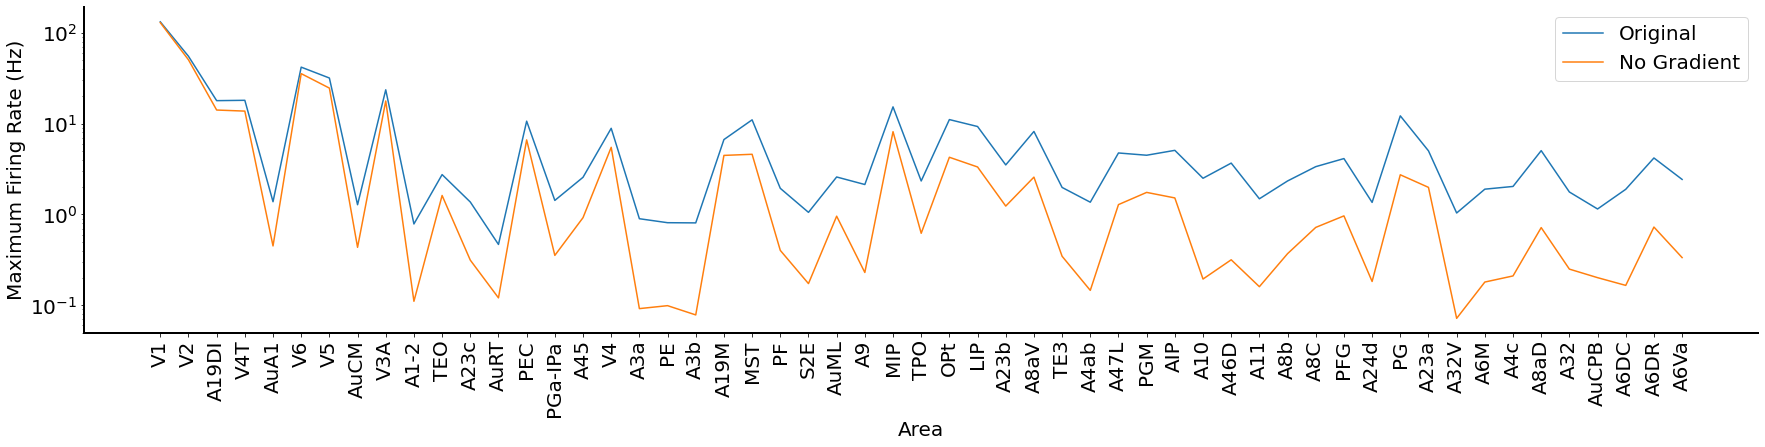

In [30]:
fig,ax=plt.subplots(1, 1,figsize=(30, 6), facecolor=(1, 1, 1))
# plt.figure(figsize=(30, 10), facecolor=(1, 1, 1))
plt.plot(max_rate, '-'); plt.yscale('log')
plt.plot(max_rate_nog, '-'); plt.yscale('log')
# plt.plot(max_rate_lig, '-'); plt.yscale('log')
plt.legend(['Original', 'No Gradient'],fontsize=20)
plt.xlabel('Area', fontsize=20)
plt.ylabel('Maximum Firing Rate (Hz)', fontsize=20)
plt.xticks(np.arange(len(p['areas'])), p['areas'],rotation=90,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the bottom and left spines thicker
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
# TCP.save_fig('Figures/6F')

# Impact of global interaction strength

In [6]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


In [44]:
def process_element(ratio, ratio_muEE):
    p_EI_k = p_ori.copy()
    p_EI_k['muEE'] = p_ori['muEE'] * ratio_muEE
    p_EI_k['muIE'] = ratio * p_ori['muIE'] * ratio_muEE

    # Compute IPR
    ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow, eigVecs_slow_normed \
    = tc.time_constant_module_shuffle_fln(p_EI_k.copy(),p_EI_k['fln_mat'].copy())
    ipr_mean = np.mean(ipr_eigenvecs)

    # Compute firing rate of PG
    I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
     = pf.run_stimulus(p_EI_k,VISUAL_INPUT=1,TOTAL_INPUT=0,T=8000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
    rate_PG = max_rate[-11]
    return ipr_mean, rate_PG


def compute_phase(ratio_muEE, ratio_lst, num_cores = 16):
    # Using joblib to parallelize
      # Set the number of cores you want to use
    results = Parallel(n_jobs=num_cores)(delayed(process_element)(ratio, ratio_muEE) for ratio in ratio_lst)

    # Unpack results
    ipr_lst, rate_lst = zip(*results)

    # Convert to numpy arrays if needed
    ipr_lst = np.array(ipr_lst)
    rate_lst = np.array(rate_lst)
    return ipr_lst, rate_lst

In [24]:
# Create initial figure and axis
ratio_muEE1 = 1
ratio_lst1 = np.linspace(1, 1.025, 200)
ipr_lst1, rate_lst1 = compute_phase(ratio_muEE1, ratio_lst1)

ratio_muEE2 = 0.75
ratio_lst2 = np.linspace(0.996, 1.03, 200)
ipr_lst2, rate_lst2 = compute_phase(ratio_muEE2, ratio_lst2)

ratio_muEE3 = 0.5
ratio_lst3 = np.linspace(0.99, 1.04, 200)
ipr_lst3, rate_lst3 = compute_phase(ratio_muEE3, ratio_lst3)
# ax2.legend(loc="upper right")

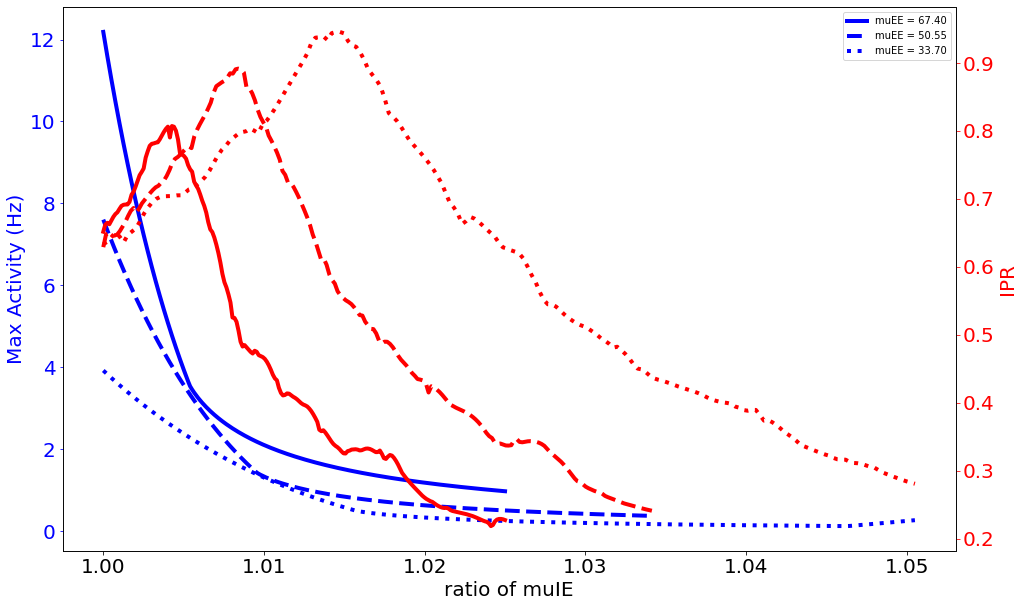

In [57]:
fig, ax1 = plt.subplots(figsize=(16, 10), facecolor=(1, 1, 1))
ax2 = ax1.twinx()

ax1.plot(ratio_lst1 / ratio_lst1[0], rate_lst1, 'b-', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst1 / ratio_lst1[0], ipr_lst1, 'r-', label="Mean IPR", linewidth=4)

ax1.plot(ratio_lst2 / ratio_lst2[0], rate_lst2, 'b--', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst2 / ratio_lst2[0], ipr_lst2, 'r--', label="Mean IPR", linewidth=4)

ax1.plot(ratio_lst3 / ratio_lst3[0], rate_lst3, 'b:', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst3 / ratio_lst3[0], ipr_lst3, 'r:', label="Mean IPR", linewidth=4)


ax1.set_xlabel('ratio of muIE', fontsize=20)
ax1.set_ylabel("Max Activity (Hz)", color='b', fontsize=20)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', colors='b', labelsize=20)
# ax1.legend(loc="upper left")

ax2.set_ylabel("IPR", color='r', fontsize=20)
ax2.tick_params('y', colors='r', labelsize=20)

ax1.legend(["muEE = {:.2f}".format(ratio_muEE1 * p_ori['muEE']), "muEE = {:.2f}".format(ratio_muEE2 * p_ori['muEE']), "muEE = {:.2f}".format(ratio_muEE3 * p_ori['muEE'])])

TCP.save_fig('Figures/6_Supp1')

In [37]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


In [20]:
def process_element(ratio, ratio_muIE):
    p_EI_k = p_ori.copy()
    p_EI_k['muEE'] = ratio *  p_ori['muEE'] * ratio_muIE
    p_EI_k['muIE'] = p_ori['muIE'] * ratio_muIE

    # Compute IPR
    ipr_eigenvecs, ipr_pos_eigenvecs, ipr_neg_eigenvecs, ipr_weight, eigVals_slow, eigVecs_slow_normed, tau_s \
    = tc.time_constant_module_shuffle_fln(p_EI_k.copy(),p_EI_k['fln_mat'].copy(), tau_flag=1)
    ipr_mean = np.mean(ipr_eigenvecs)
    tau_std = np.std(tau_s)
    
    # Compute firing rate of PG
    I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
     = pf.run_stimulus(p_EI_k,VISUAL_INPUT=1,TOTAL_INPUT=0,T=8000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
    rate_PG = max_rate[-11]
    return ipr_mean, rate_PG, tau_std


def compute_phase(ratio_muIE, ratio_lst, num_cores = 16):
    # Using joblib to parallelize
      # Set the number of cores you want to use
    results = Parallel(n_jobs=num_cores)(delayed(process_element)(ratio, ratio_muIE) for ratio in ratio_lst)

    # Unpack results
    ipr_lst, rate_lst, tau_std_lst = zip(*results)

    # Convert to numpy arrays if needed
    ipr_lst = np.array(ipr_lst)
    rate_lst = np.array(rate_lst)
    tau_std_lst = np.array(tau_std_lst)
    return ipr_lst, rate_lst, tau_std_lst

In [21]:
# Create initial figure and axis
ratio_muIE1 = 1
ratio_lst1 = np.linspace(0.975, 1, 200)
ipr_lst1, rate_lst1, tau_std_lst1 = compute_phase(ratio_muIE1, ratio_lst1)

ratio_muIE2 = 0.75
ratio_lst2 = np.linspace(0.97, 1.0025, 200)
ipr_lst2, rate_lst2, tau_std_lst2 = compute_phase(ratio_muIE2, ratio_lst2)

ratio_muIE3 = 0.5
ratio_lst3 = np.linspace(0.96, 1.01, 200)
ipr_lst3, rate_lst3, tau_std_lst3 = compute_phase(ratio_muIE3, ratio_lst3)
# ax2.legend(loc="upper right")

In [22]:
0.97 / 1.0025

0.9675810473815462

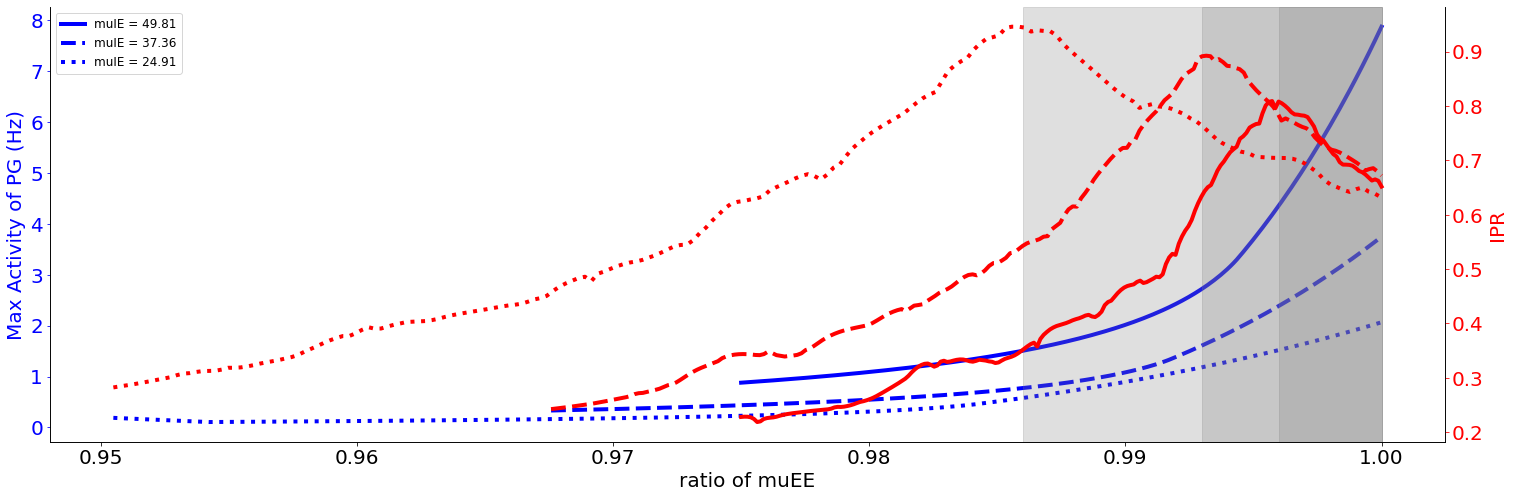

In [23]:
fig, ax1 = plt.subplots(figsize=(25, 8), facecolor=(1, 1, 1))
ax2 = ax1.twinx()

ax1.plot(ratio_lst1 / ratio_lst1[-1], rate_lst1, 'b-', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst1 / ratio_lst1[-1], ipr_lst1, 'r-', label="Mean IPR", linewidth=4)
plt.axvspan(0.986, 1.0, color='grey', alpha=0.25)

ax1.plot(ratio_lst2 / ratio_lst2[-1], rate_lst2, 'b--', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst2 / ratio_lst2[-1], ipr_lst2, 'r--', label="Mean IPR", linewidth=4)
plt.axvspan(0.993, 1.0, color='grey', alpha=0.25)

ax1.plot(ratio_lst3 / ratio_lst3[-1], rate_lst3, 'b:', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst3 / ratio_lst3[-1], ipr_lst3, 'r:', label="Mean IPR", linewidth=4)
plt.axvspan(0.996, 1.0, color='grey', alpha=0.25)

ax1.set_xlabel('ratio of muEE', fontsize=20)
ax1.set_ylabel("Max Activity of PG (Hz)", color='b', fontsize=20)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', colors='b', labelsize=20)
# ax1.legend(loc="upper left")

ax2.set_ylabel("IPR", color='r', fontsize=20)
ax2.tick_params('y', colors='r', labelsize=20)

ax1.legend(["muIE = {:.2f}".format(ratio_muIE1 * p_ori['muIE']), "muIE = {:.2f}".format(ratio_muIE2 * p_ori['muIE']), "muIE = {:.2f}".format(ratio_muIE3 * p_ori['muIE'])], fontsize='large')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

TCP.save_fig('Figures/6_Supp2')

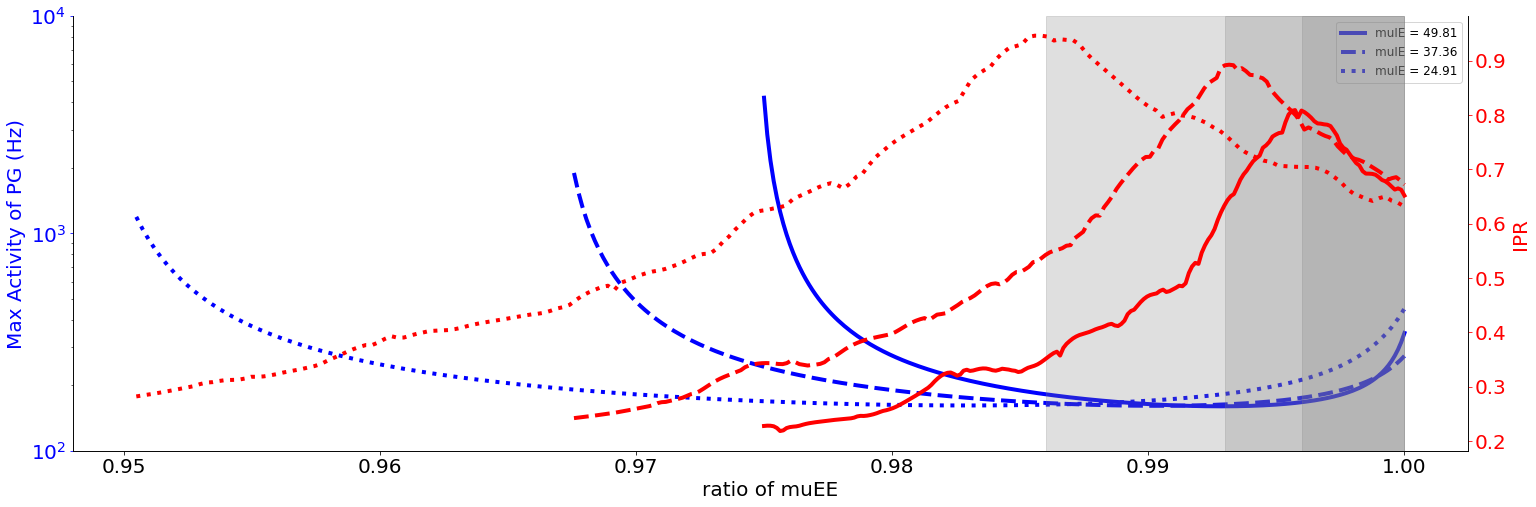

In [36]:
fig, ax1 = plt.subplots(figsize=(25, 8), facecolor=(1, 1, 1))
ax2 = ax1.twinx()

ax1.semilogy(ratio_lst1 / ratio_lst1[-1], tau_std_lst1, 'b-', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst1 / ratio_lst1[-1], ipr_lst1, 'r-', label="Mean IPR", linewidth=4)
plt.axvspan(0.986, 1.0, color='grey', alpha=0.25)

ax1.semilogy(ratio_lst2 / ratio_lst2[-1], tau_std_lst2, 'b--', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst2 / ratio_lst2[-1], ipr_lst2, 'r--', label="Mean IPR", linewidth=4)
plt.axvspan(0.993, 1.0, color='grey', alpha=0.25)

ax1.semilogy(ratio_lst3 / ratio_lst3[-1], tau_std_lst3, 'b:', label="Max Activity of PG", linewidth=4)
ax2.plot(ratio_lst3 / ratio_lst3[-1], ipr_lst3, 'r:', label="Mean IPR", linewidth=4)
plt.axvspan(0.996, 1.0, color='grey', alpha=0.25)

ax1.set_xlabel('ratio of muEE', fontsize=20)
ax1.set_ylabel("Max Activity of PG (Hz)", color='b', fontsize=20)
ax1.tick_params('x', labelsize=20)
ax1.tick_params('y', colors='b', labelsize=20)
# ax1.legend(loc="upper left")

ax1.set_ylim([1e2, 1e4])
ax2.set_ylabel("IPR", color='r', fontsize=20)
ax2.tick_params('y', colors='r', labelsize=20)

ax1.legend(["muIE = {:.2f}".format(ratio_muIE1 * p_ori['muIE']), "muIE = {:.2f}".format(ratio_muIE2 * p_ori['muIE']), "muIE = {:.2f}".format(ratio_muIE3 * p_ori['muIE'])], fontsize='large')
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

TCP.save_fig('Figures/6_Supp2_II')

# Possible Figure -- Criticality & Signal propagation?

In [114]:
p = pf.load_data(datafile)
fln_mat = p['fln_mat'].copy()

p_ori, W_ori = pf.genetate_net_connectivity(p.copy(),FIT_HIER=1, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)

Initializing Model. From subgraph_data_marmoset.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
CONSENSUS_CASE=0
No STRONG GBA


In [115]:
# p_grad = p.copy()
# grad_ratio = 0
# # p_grad['eta'] = p_ori['eta'] * grad_ratio
# p_grad['hier_vals'] = p_ori['hier_vals'] * grad_ratio; p_grad['hier_vals_inh'] = p_ori['hier_vals_inh'] * grad_ratio
# p_grad, W_grad = pf.genetate_net_connectivity(p_grad.copy(),FIT_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
#                                 IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
#                                 MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
#                                 diverse_hi=4)

In [116]:
def process_element(grad_ratio):
    p_grad = p.copy()
    # p_grad['eta'] = p_ori['eta'] * grad_ratio
    p_grad['hier_vals'] = p_ori['hier_vals'] * grad_ratio; p_grad['hier_vals_inh'] = p_ori['hier_vals_inh'] * grad_ratio
    p_grad, W_grad = pf.genetate_net_connectivity(p_grad.copy(),FIT_HIER=0, LINEAR_HIER=0,IDENTICAL_HIER=0, LOCAL_IDENTICAL_HIERARCHY=0,ZERO_FLN=0,
                                    IDENTICAL_FLN=0,SHUFFLE_FLN=0,SHUFFLE_TYPE=0,STRONG_GBA=0,
                                    MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,LONGRANGE_EI_ASYMMETRY=0,CONSENSUS_CASE=CONSENSUS_CASE,
                                    diverse_hi=4)
    # Compute firing rate of PG
    I_stim_exc, r_exc, r_inh, area_stim_idx, dt, t_plot, decay_time, max_rate \
     = pf.run_stimulus(p_grad,VISUAL_INPUT=1,TOTAL_INPUT=0,T=8000,PULSE_INPUT=1, MACAQUE_CASE=MACAQUE_CASE,GATING_PATHWAY=0,CONSENSUS_CASE=0,plot_Flag=0)
    rate_PG = max_rate[-11]
    return rate_PG


def compute_rate(ratio_lst, num_cores = 16):
    # Using joblib to parallelize
      # Set the number of cores you want to use
    results = Parallel(n_jobs=num_cores)(delayed(process_element)(grad_ratio) for grad_ratio in ratio_lst)

    # Unpack results
    rate_lst = results

    # Convert to numpy arrays if needed
    rate_lst = np.array(rate_lst)
    return rate_lst

In [117]:
ratio_lst_grad = np.linspace(0, 1, 100)
rate_lst_grad = compute_rate(ratio_lst_grad)

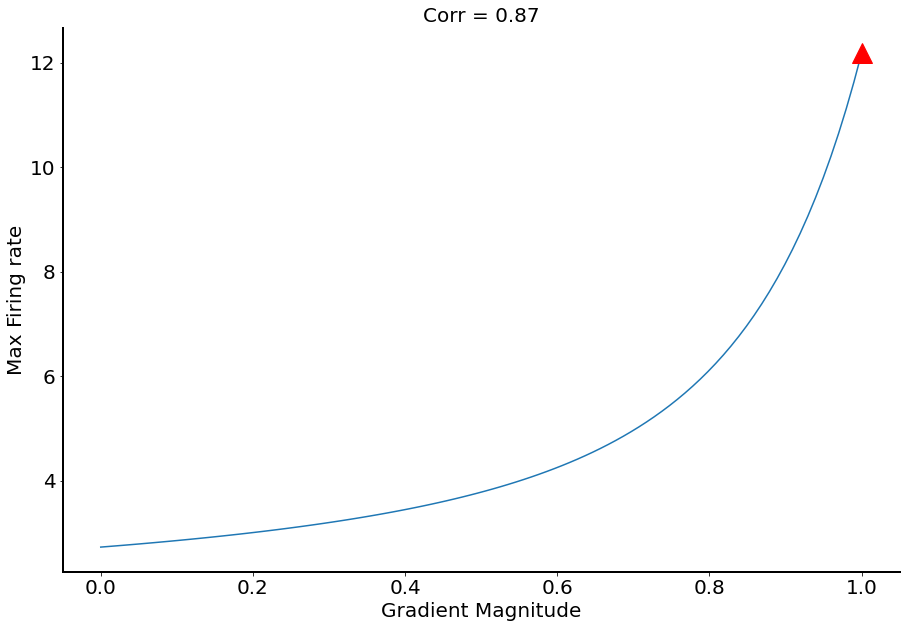

In [119]:
fig = TCP.plot_line_curve(rate_lst_grad, ratio_lst_grad, p_ori['areas'],
                          x_label='Gradient Magnitude', y_label='Max Firing rate')
plt.plot(ratio_lst_grad[-1], rate_lst_grad[-1], 'r^', ms=20)
TCP.save_fig('Figures/6_Supp3')